In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  GaussianNB
import numpy as np
from xgboost import XGBClassifier
import json
import pickle

In [ ]:
dataset = pd.read_csv("/content/raw.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
dataset.sort_values(by="chol", ascending=False)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
79,67,0,2,115,564,0,2,160,0,1.6,1,0,2,0
83,65,0,2,140,417,1,2,157,0,0.8,0,1,0,0
238,56,0,3,134,409,0,2,150,1,1.9,1,2,2,1
180,63,0,3,150,407,0,2,154,0,4.0,1,3,2,1
188,62,0,3,140,394,0,2,157,0,1.2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,71,0,3,112,149,0,0,125,0,1.6,1,0,0,0
129,49,1,2,118,149,0,2,126,0,0.8,0,3,0,1
137,44,0,2,108,141,0,0,175,0,0.6,1,0,0,0
230,57,1,3,130,131,0,0,115,1,1.2,1,1,2,1


In [ ]:
corr = dataset.corr(method ='pearson')
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


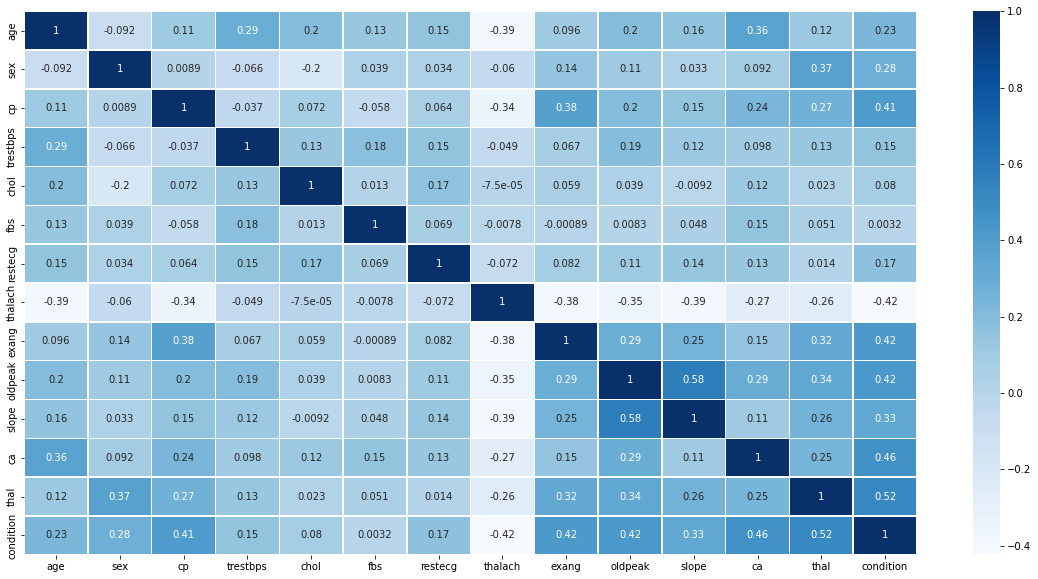

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True, ax=ax, linewidths=0.5)

In [ ]:
Y = dataset["condition"]
del dataset["condition"]
X = dataset

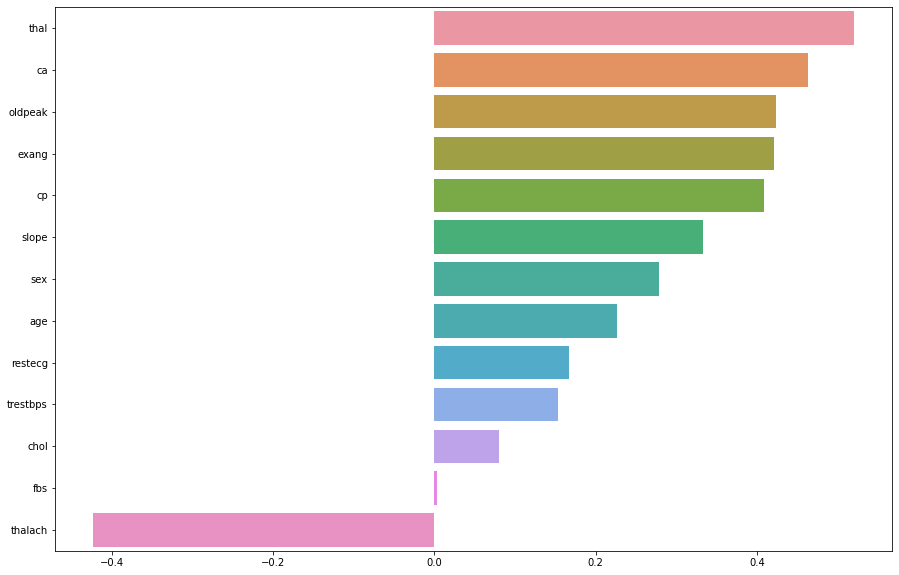

In [ ]:
X_mean = X.mean()
X_features = X.columns


correlations = X.corrwith(Y).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [ ]:
need_transform_columns = ["age", "sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
numeric_columns = []
for col in dataset.columns:
  if col not in need_transform_columns:
    numeric_columns.append(col)

numeric_columns

['trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
for col in need_transform_columns:
  X = pd.concat([X, pd.get_dummies(X[col], prefix= col)],axis=1)
  X.drop([col],axis=1, inplace=True)

In [ ]:
X

,trestbps,chol,thalach,oldpeak,age_29,age_34,age_35,age_37,age_38,age_39,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,160,234,131,0.1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,140,239,151,1.8,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,150,226,114,2.6,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,138,282,174,1.4,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,110,211,144,1.8,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,152,223,181,0.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
293,118,219,140,1.2,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
294,120,198,130,1.6,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
295,138,183,182,1.4,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
X.columns

Index(['trestbps', 'chol', 'thalach', 'oldpeak', 'age_29', 'age_34', 'age_35',
       'age_37', 'age_38', 'age_39', 'age_40', 'age_41', 'age_42', 'age_43',
       'age_44', 'age_45', 'age_46', 'age_47', 'age_48', 'age_49', 'age_50',
       'age_51', 'age_52', 'age_53', 'age_54', 'age_55', 'age_56', 'age_57',
       'age_58', 'age_59', 'age_60', 'age_61', 'age_62', 'age_63', 'age_64',
       'age_65', 'age_66', 'age_67', 'age_68', 'age_69', 'age_70', 'age_71',
       'age_74', 'age_76', 'age_77', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2',
       'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2',
       'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1',
       'ca_2', 'ca_3', 'thal_0', 'thal_1', 'thal_2'],
      dtype='object')

In [ ]:
Y.value_counts()

0    160
1    137
Name: condition, dtype: int64

In [ ]:
numeric_columns

['trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train[numeric_columns])
X_train[numeric_columns] = scaler.transform(X_train[numeric_columns]).copy()
scaler.fit(X_test[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns]).copy()

In [ ]:
model = LogisticRegression(penalty = 'l1', max_iter = 5000, solver = "liblinear")
model.fit(X_train, y_train)
pred = model.predict(X_test)

metrics = {}

print("Roc|Auc = ", roc_auc_score(y_test, pred))
metrics["Roc|Auc"] = roc_auc_score(y_test, pred)

print("Accuracy = ", accuracy_score(y_test, pred))
metrics["Accuracy"] = accuracy_score(y_test, pred)

print("F1 = ", f1_score(y_test, pred))
metrics["F1"] = f1_score(y_test, pred)

Roc|Auc =  0.7857142857142857
Accuracy =  0.7833333333333333
F1 =  0.7796610169491526


In [ ]:
pd.DataFrame(model.predict(X_test)).to_csv("logistic_regression_predict.csv")

with open("logistic_regression.pkl", "wb") as f:
    pickle.dump(model, f)

# with open("logistic_regression.pkl", "rb") as f:
#     model = pickle.load(f)

with open('logistic_regression_metrics.json', 'w') as fp:
    json.dump(metrics, fp)

# with open('logistic_regression_metrics.json') as fp:
#     metrics = json.load(fp)
#     print(metrics)

### Метод ближайших соседей

### Для начала найдем оптимальный параметр для нашей модели

In [ ]:
n_nb = range(1, 200)
res = []

for i in tqdm(n_nb): 
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(X_train, y_train)

  prediction = neigh.predict(X_test)

  res.append((np.mean(prediction == y_test)))

100%|██████████| 199/199 [00:02<00:00, 79.70it/s]


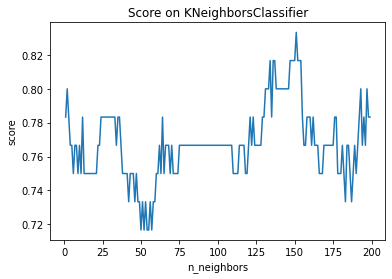

In [ ]:
plt.plot(n_nb, res)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.title("Score on KNeighborsClassifier")
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors=18)
model.fit(X_train, y_train)
pred = model.predict(X_test)

metrics = {}

print("Roc|Auc = ", roc_auc_score(y_test, pred))
metrics["Roc|Auc"] = roc_auc_score(y_test, pred)

print("Accuracy = ", accuracy_score(y_test, pred))
metrics["Accuracy"] = accuracy_score(y_test, pred)

print("F1 = ", f1_score(y_test, pred))
metrics["F1"] = f1_score(y_test, pred)

Roc|Auc =  0.7522321428571428
Accuracy =  0.75
F1 =  0.7457627118644068


In [ ]:
pd.DataFrame(model.predict(X_test)).to_csv("k_neighbors_classifier_predict.csv")

with open("k_neighbors_classifier.pkl", "wb") as f:
    pickle.dump(model, f)

# with open("k_neighbors_classifier.pkl", "rb") as f:
#     model = pickle.load(f)

with open('k_neighbors_classifier_metrics.json', 'w') as fp:
    json.dump(metrics, fp)

# with open('k_neighbors_classifier_metrics.json') as fp:
#     metrics = json.load(fp)
#     print(metrics)

### Наивный Байес

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

metrics = {}

print("Roc|Auc = ", roc_auc_score(y_test, pred))
metrics["Roc|Auc"] = roc_auc_score(y_test, pred)

print("Accuracy = ", accuracy_score(y_test, pred))
metrics["Accuracy"] = accuracy_score(y_test, pred)

print("F1 = ", f1_score(y_test, pred))
metrics["F1"] = f1_score(y_test, pred)

Roc|Auc =  0.6316964285714286
Accuracy =  0.6166666666666667
F1 =  0.676056338028169


In [ ]:
pd.DataFrame(model.predict(X_test)).to_csv("gaussian_n_b_predict.csv")

with open("gaussian_n_b.pkl", "wb") as f:
    pickle.dump(model, f)

# with open("gaussian_n_b.pkl", "rb") as f:
#     model = pickle.load(f)

with open('gaussian_n_b_metrics.json', 'w') as fp:
    json.dump(metrics, fp)

# with open('gaussian_n_b_metrics.json') as fp:
#     metrics = json.load(fp)
#     print(metrics)

In [ ]:
model = xgboost.XGBClassifier(learning_rate=0.0001, max_depth=5, n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

metrics = {}

print("Roc|Auc = ", roc_auc_score(y_test, pred))
metrics["Roc|Auc"] = roc_auc_score(y_test, pred)

print("Accuracy = ", accuracy_score(y_test, pred))
metrics["Accuracy"] = accuracy_score(y_test, pred)

print("F1 = ", f1_score(y_test, pred))
metrics["F1"] = f1_score(y_test, pred)

Roc|Auc =  0.8147321428571428
Accuracy =  0.8166666666666667
F1 =  0.7999999999999999


In [ ]:
metrics

{'Accuracy': 0.8166666666666667,
 'F1': 0.7999999999999999,
 'Roc|Auc': 0.8147321428571428}

In [ ]:
pd.DataFrame(model.predict(X_test)).to_csv("XGBClassifier_predict.csv")

with open("XGBClassifier.pkl", "wb") as f:
    pickle.dump(model, f)

# with open("XGBClassifier.pkl", "rb") as f:
#     model = pickle.load(f)

with open('XGBClassifier_metrics.json', 'w') as fp:
    json.dump(metrics, fp)

# with open('XGBClassifier_metrics.json') as fp:
#     metrics = json.load(fp)
#     print(metrics)

In [ ]:
def make_artefacts(model, X_test, y_test):
  metrics = {}
  metrics["Roc|Auc"] = roc_auc_score(y_test, model.predict(X_test))
  metrics["Accuracy"] = accuracy_score(y_test, model.predict(X_test))
  metrics["F1"] = f1_score(y_test, model.predict(X_test))
  
  with open('XGBClassifier_metrics.json', 'w') as fp:
    json.dump(metrics, fp)